In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

data = load_iris()


In [2]:
data.keys()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris = pd.DataFrame(data.data, columns=data.feature_names) # data.data is the data inside the dataset and data.feature_names is the column names
iris['target'] = data.target # adding a new column to the dataframe
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
#filtrando target 0 e 1
iris=iris[iris.target.isin([0,1])]
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.205926,0.812458,0.789608,0.728290
sepal width (cm),-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal length (cm),0.812458,-0.602663,1.000000,0.979322,0.969990
petal width (cm),0.789608,-0.570883,0.979322,1.000000,0.960307
target,0.728290,-0.690684,0.969990,0.960307,1.000000


<Axes: >

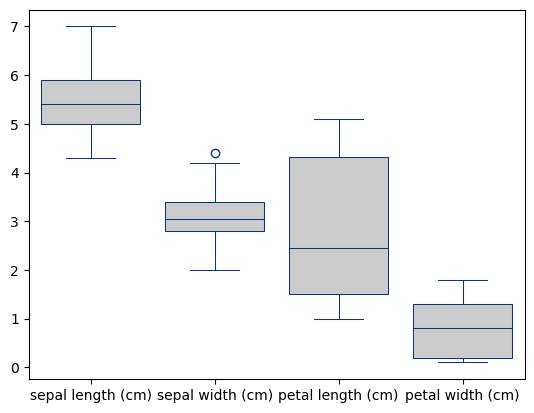

In [6]:
#imprimindo o boxplot retirando a coluna target
sns.boxplot(data=iris.drop('target',axis=1),color=".8", linecolor="#137", linewidth=.75)
#sns.boxplot(data=iris,color=".8", linecolor="#137", linewidth=.75)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='target', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='target', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='

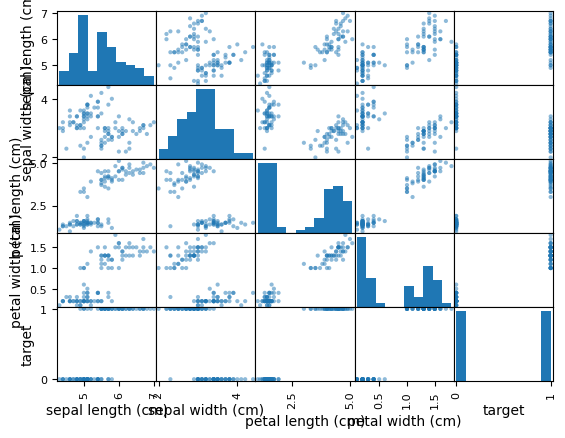

In [7]:
pd.plotting.scatter_matrix(iris)

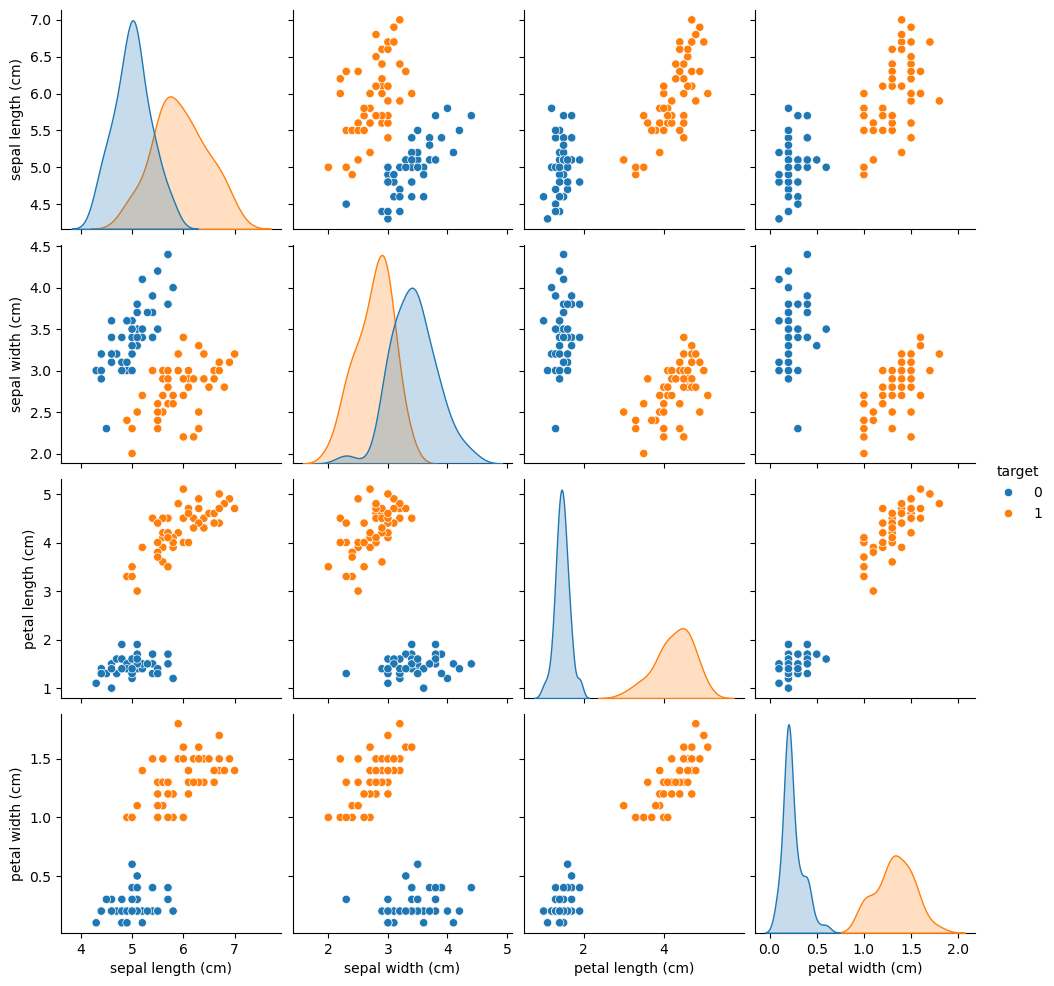

In [8]:
sns.pairplot(iris, hue='target') #hue is the target column that will be used to color the points in the plot 

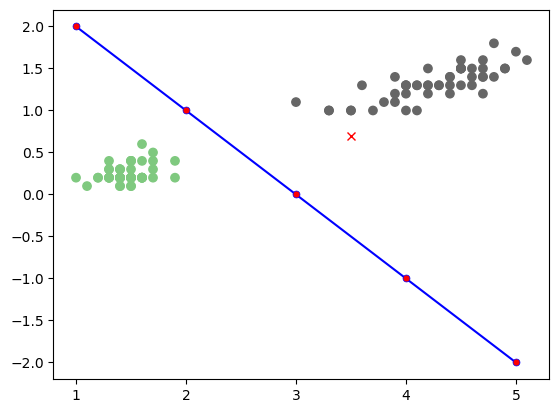

In [97]:
#traçando scatterplot plot e a reta
fig, ax = plt.subplots()

x = iris['petal length (cm)']
y = iris['petal width (cm)']
ax.scatter(x, y, c=iris['target'], cmap='Accent')

#x_reta = [1,   4.0]
#y_reta = [1.5,0.25]
#ax.plot(x_reta, y_reta, c='red', marker='--')

x_reta2 = np.arange(1,6)
y_reta2 = (-1)*x_reta2 + 3 #y = -x + 3
ax.plot(x_reta2, y_reta2, c='blue', marker='.', markersize=10, markerfacecolor='red', markeredgecolor='blue', markeredgewidth=0.5) #plotando a reta y = -x + 3

ax.plot(3.5, 0.7, c='r', marker='x') #plotando o ponto (3.5, 0.7)


In [102]:
#usando percepton
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)

In [113]:
X = iris[['petal length (cm)', 'petal width (cm)']]
y = iris.target

clf.fit(X, y)
clf.coef_

array([[0.9, 1.7]])

In [ ]:
#traçando scatterplot plot e a reta
fig, ax = plt.subplots()

x = iris['petal length (cm)']
y = iris['petal width (cm)']
ax.scatter(x, y, c=iris['target'], cmap='Accent')

#x_reta = [1,   4.0]
#y_reta = [1.5,0.25]
#ax.plot(x_reta, y_reta, c='red', marker='--')

x_reta2 = np.arange(1,6)
y_reta2 = (-1)*x_reta2 + 3 #y = -x + 3
ax.plot(x_reta2, y_reta2, c='blue', marker='.', markersize=10, markerfacecolor='red', markeredgecolor='blue', markeredgewidth=0.5) #plotando a reta y = -x + 3

ax.plot(3.5, 0.7, c='r', marker='x') #plotando o ponto (3.5, 0.7)


Acurácia do Perceptron: 100.00%


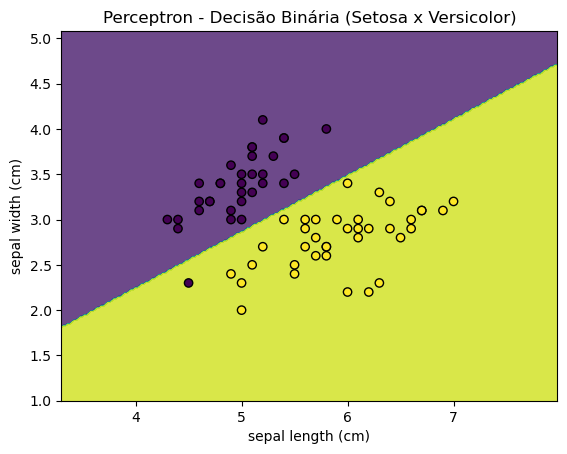

In [118]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Carregar a base de dados Iris
iris = load_iris()
X = iris.data  # As características (atributos) das flores
y = iris.target  # As classes (tipos de flores)

# Filtrando para um problema de classificação binária (por exemplo, classificar entre setosa e não setosa)
X = X[y != 2]  # Pegando apenas as duas primeiras classes (setosa e versicolor)
y = y[y != 2]  # Pegando os labels dessas classes

# Dividir a base de dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Fazer previsões com o modelo
y_pred = perceptron.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Perceptron: {accuracy * 100:.2f}%')

# Visualizar a decisão do Perceptron (para apenas duas características)
X_train_2d = X_train[:, :2]  # Pegando apenas as duas primeiras colunas
perceptron.fit(X_train_2d, y_train)

# Gerando uma grade para visualização
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando as regiões de decisão
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title('Perceptron - Decisão Binária (Setosa x Versicolor)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
